## Сегментация пользователей банка

источник датасета: https://www.kaggle.com

Описание проекта: В нашем распоряжении датасет, содержащий информацию о клиентах банка, располагающегося во Франции, Испании и Германии. Данные содержат следующую информацию:

`customer_id` — идентификатор пользователя,

`credit_score` — баллы кредитного скоринга,

`country` — страна,

`gender` — пол,

`age` — возраст,

`tenure` — количество объектов в собственности,

`balance` — баланс на счёте,

`products_number` — количество продуктов, которыми пользуется клиент,

`credit_card` — есть ли кредитная карта,

`active_member` — активный клиент,

`estimated_salary` — заработная плата клиента,

`churn` — клиент ушёл или нет (1-ушел, 0 - нет).

Цель исследования: исследовательский анализ данных для составления портрета пользователя, склонного уходить и рекомендаций для продуктового менеджера по удержанию клиентов. 

Задачи исследования: 
1. Провести исследовательский анализ данных
2. Сегментировать пользователей на основе данных в разрезе различных атрибутов и провести сравнительный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') 

In [2]:
bank = pd.read_csv('../bank/Bank Customer Churn Prediction.csv')

In [3]:
bank.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


В датасете 10000 строк, 12 колонок, нет нулевых значений. можно работать спокойно

In [5]:
bank.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

Количество пользователей совпадает с кол-вом строк датасета, следовательно все пользователи уникальные.
У одного не указана зарплата, может быть безработный.

Проведем EDA-анализ

In [6]:
bank.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Проанализируем общие портреты клиентов:
Возраст пользователей банка варьируется от 18 до 92 лет, но чаще всего от 32 до 44. Средний возраст ~39 лет, медианный - 37 лет. 
Кредитные рейтинги - от 350 до 850.
Зарплата клиента 11.6 - 199992.5, при этом средняя = 100090.239881, а 25 квантиль равен 51002.1, это очень интересно, и дальше мы посмотрим на распределение по зарплате на наличие выбросов

Построим боксплот для отображения выбросов в столбцах с возрастом, балансом на счёте и зарплатой

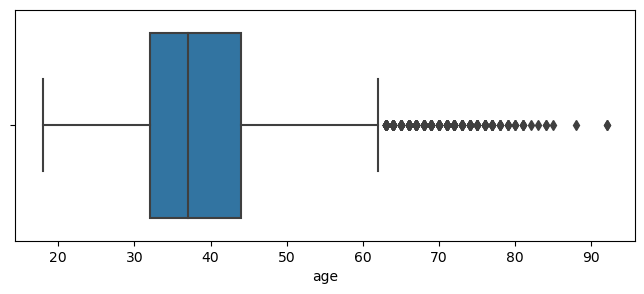

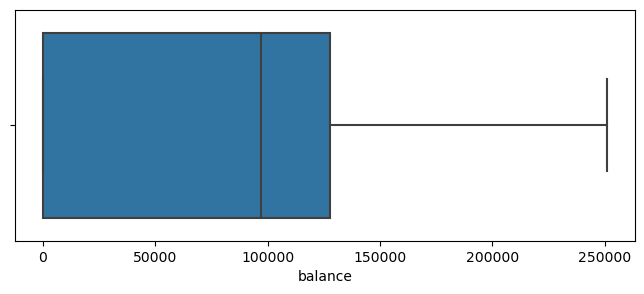

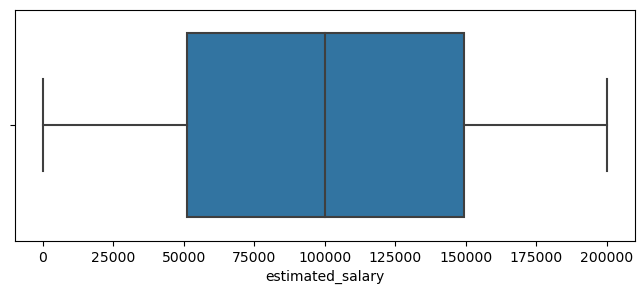

In [7]:
for column in ['age', 'balance', 'estimated_salary']:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=column, data=bank)
    plt.show();

Боксплот показал, что выбросами (данными, сильно отличающися от общего распределения) являются клиенты старше 62 лет.
В остальных колонках выбросов не обнаружено.

In [8]:
# создадим колонку с разделением возраста по категориям
# Т.к. мы выяснили что минимальный возраст клиента - 18 лет, начнем градацию от него.
bank['age_cathegory'] = pd.cut(bank.age, bins=(18,29,50,62, np.inf), 
                           labels=['18-29','30-45','46-62','Старше 62'])
bank

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_cathegory
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,30-45
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,30-45
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,30-45
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-45
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,30-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,30-45
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,30-45
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,30-45
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,30-45


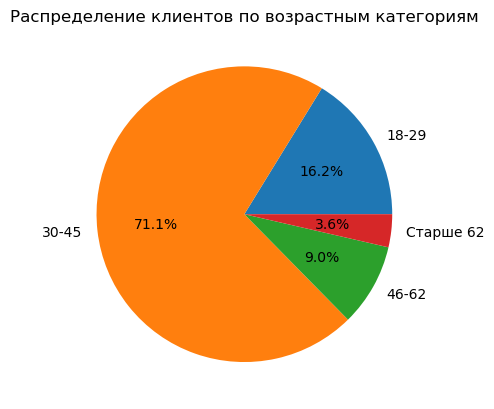

In [9]:
# Визуализируем соотношение возрастных категорий
fig1,ax1 = plt.subplots()
df = bank.groupby('age_cathegory').agg({'customer_id': 'count'})
ax1.pie(df['customer_id'], labels=df.index, autopct='%1.1f%%')
ax1.set_title(f'Распределение клиентов по возрастным категориям')
plt.show()

Основными клиентами банков являются люди возрастом от 30 до 45 лет. Что вполне логично, этот класт людей представляет основу рабочего населения с нуждами в банковских продуктов

In [10]:
bank.drop(['customer_id', 'products_number'], axis=1).groupby('churn').mean()

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary
churn,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,0.699067,0.360825,101465.677531


Можно отметить следующее:
средний возраст ушедших клиентов примерно 44-45 лет;
доля оттока у владельцев кредитных карт и тех, кто ей не пользуется, мало различаются.

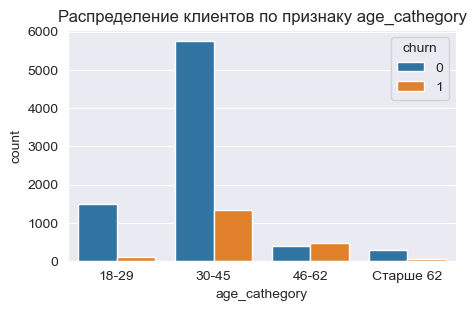

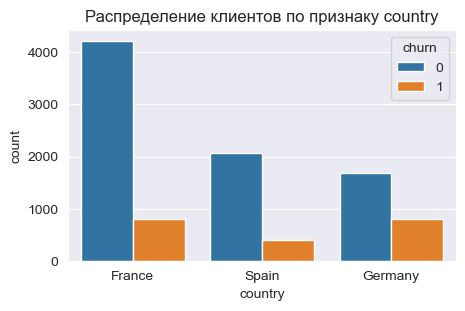

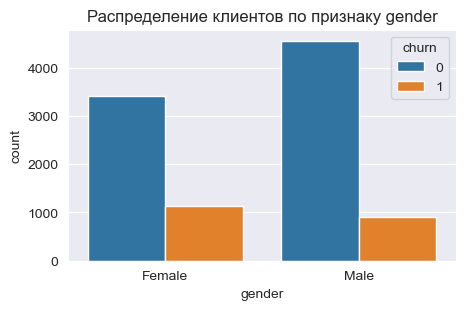

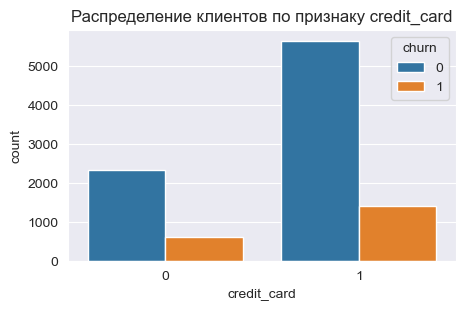

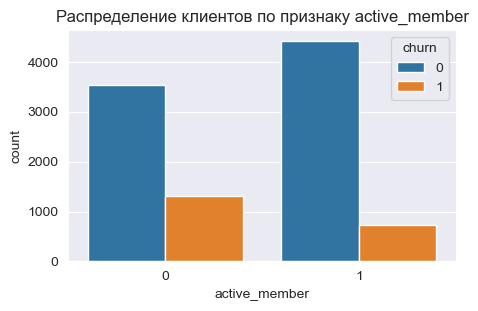

In [19]:
for column in ['age_cathegory','country','gender','credit_card','active_member']:
    plt.figure(figsize=(5,3))
    sns.countplot(data=bank, x=column, hue="churn")
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.show()

Вычислим некоторые показатели в процентах

In [12]:
round(bank.groupby('age_cathegory').churn.value_counts(normalize=True)*100, 1)
# отток в % по возрастным категориям

age_cathegory  churn
18-29          0        92.5
               1         7.5
30-45          0        81.0
               1        19.0
46-62          1        54.3
               0        45.7
Старше 62      0        79.7
               1        20.3
Name: churn, dtype: float64

In [13]:
round(bank.groupby('country').churn.value_counts(normalize=True)*100, 1) 
# отток в % по странам

country  churn
France   0        83.8
         1        16.2
Germany  0        67.6
         1        32.4
Spain    0        83.3
         1        16.7
Name: churn, dtype: float64

In [14]:
round(bank.groupby('gender').churn.value_counts(normalize=True)*100, 1) 
# отток в % по странам

gender  churn
Female  0        74.9
        1        25.1
Male    0        83.5
        1        16.5
Name: churn, dtype: float64

- Наименьший отток у самой молодой категории (18-29 лет), наибольшей у категории 46-62 года, видимо условия банка для них становятся невыгодными и они уходят из банка.
- Среди стран наибольший отток клиентов в Германии, а в Испании и Франции примерно одинаково.
- Уходят из банка больше всего женщины

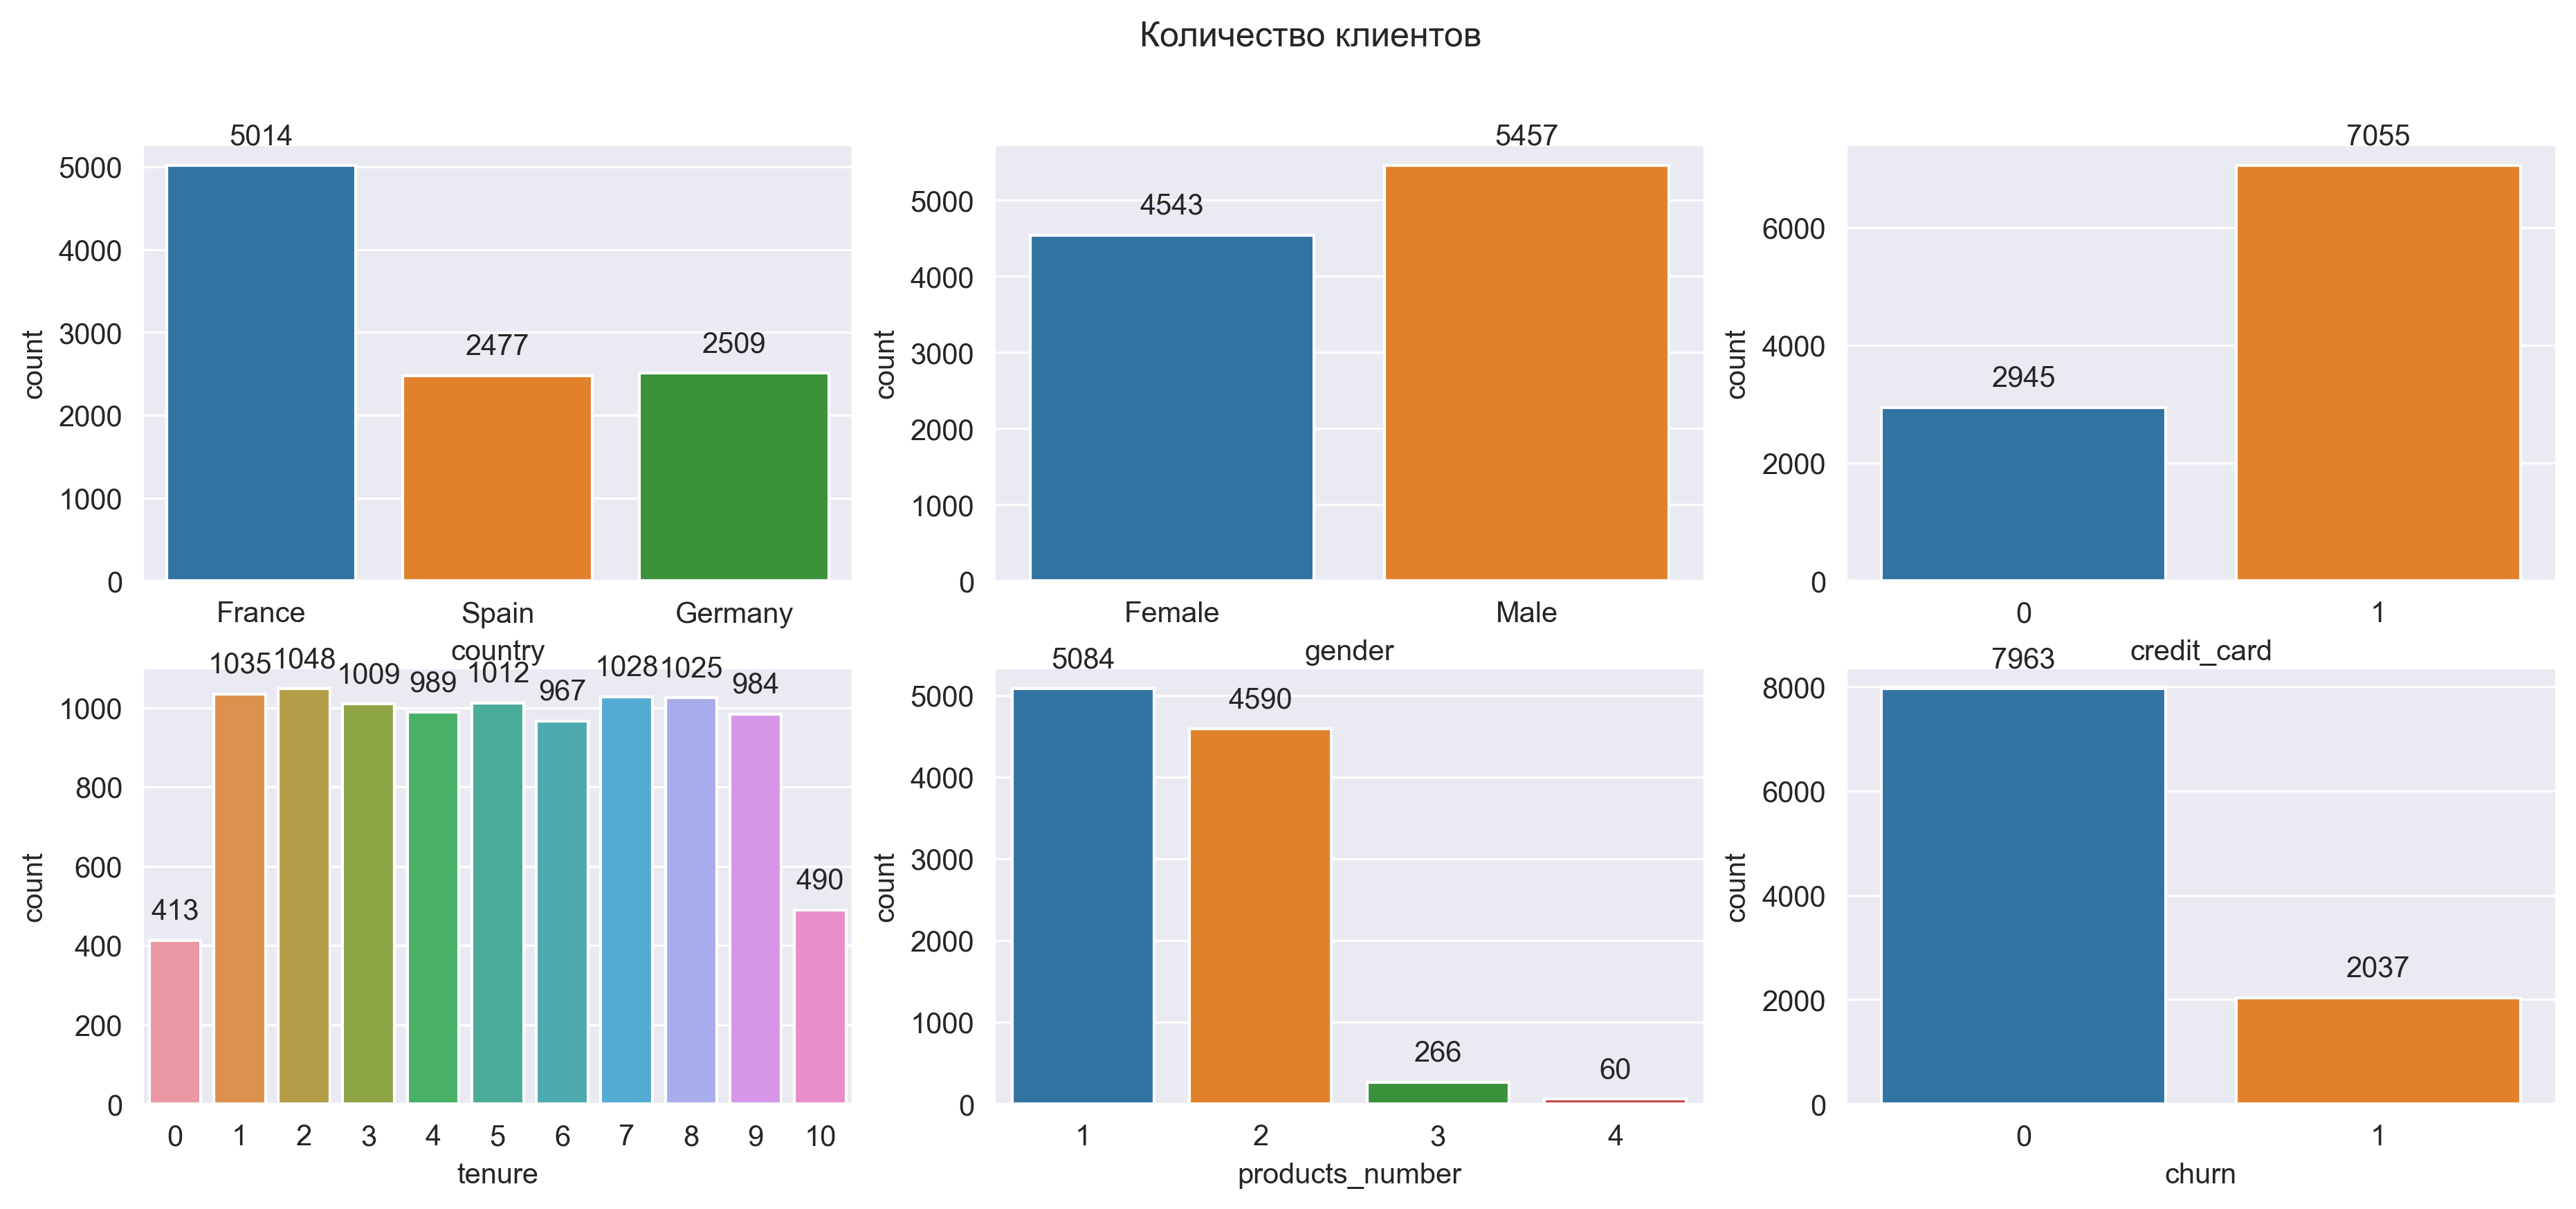

In [15]:
sns.set_style("darkgrid")
column_list = ['country', 'gender', 'credit_card', 'tenure', 'products_number', 'churn']

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 6) 
fig.set_dpi(300)
for variable, subplot in zip(column_list, ax.flatten()):
    splot = sns.countplot(bank[variable], ax=subplot)
    for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
fig.suptitle("Количество клиентов");

на графиках видим:

- Больше всего клиентов во Франции, в Германии и Испании примерно одинаково;
- Мужчин немного больше чем женщин;
- Владельцев кредитных карт значительно больше чем клиентов, не пользующихся картой;
- У значительного количества клиентов по несколько объектов в собственности;
- Большинство клиентов имеют 1,2 продукта банка, клиентов с 3 и 4-мя продуктами очень мало;
- Отток довольно большой, около 20%.

In [16]:
bank.drop('customer_id', axis=1).groupby('products_number').mean()

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,churn
products_number,,,,,,,,
1,649.120968,39.673092,4.974626,98551.870614,0.703777,0.504131,99487.256851,0.277144
2,652.188671,37.753595,5.051852,51879.145813,0.707190,0.532898,100452.012821,0.075817
3,648.105263,43.195489,5.003759,75458.328195,0.714286,0.424812,104318.130564,0.827068
4,653.583333,45.683333,5.300000,93733.135000,0.683333,0.483333,104763.723333,1.000000


Видим, что:
- огромная доля оттока у людей, пользующихся 3-4 продуктами банка (83-100%), но в количественном значении их небольшое количество;
- Средний возраст выше у этих клиентов больше, чем у остальных;

Построим распределения по количеству имеющихся банковских продуктов. 

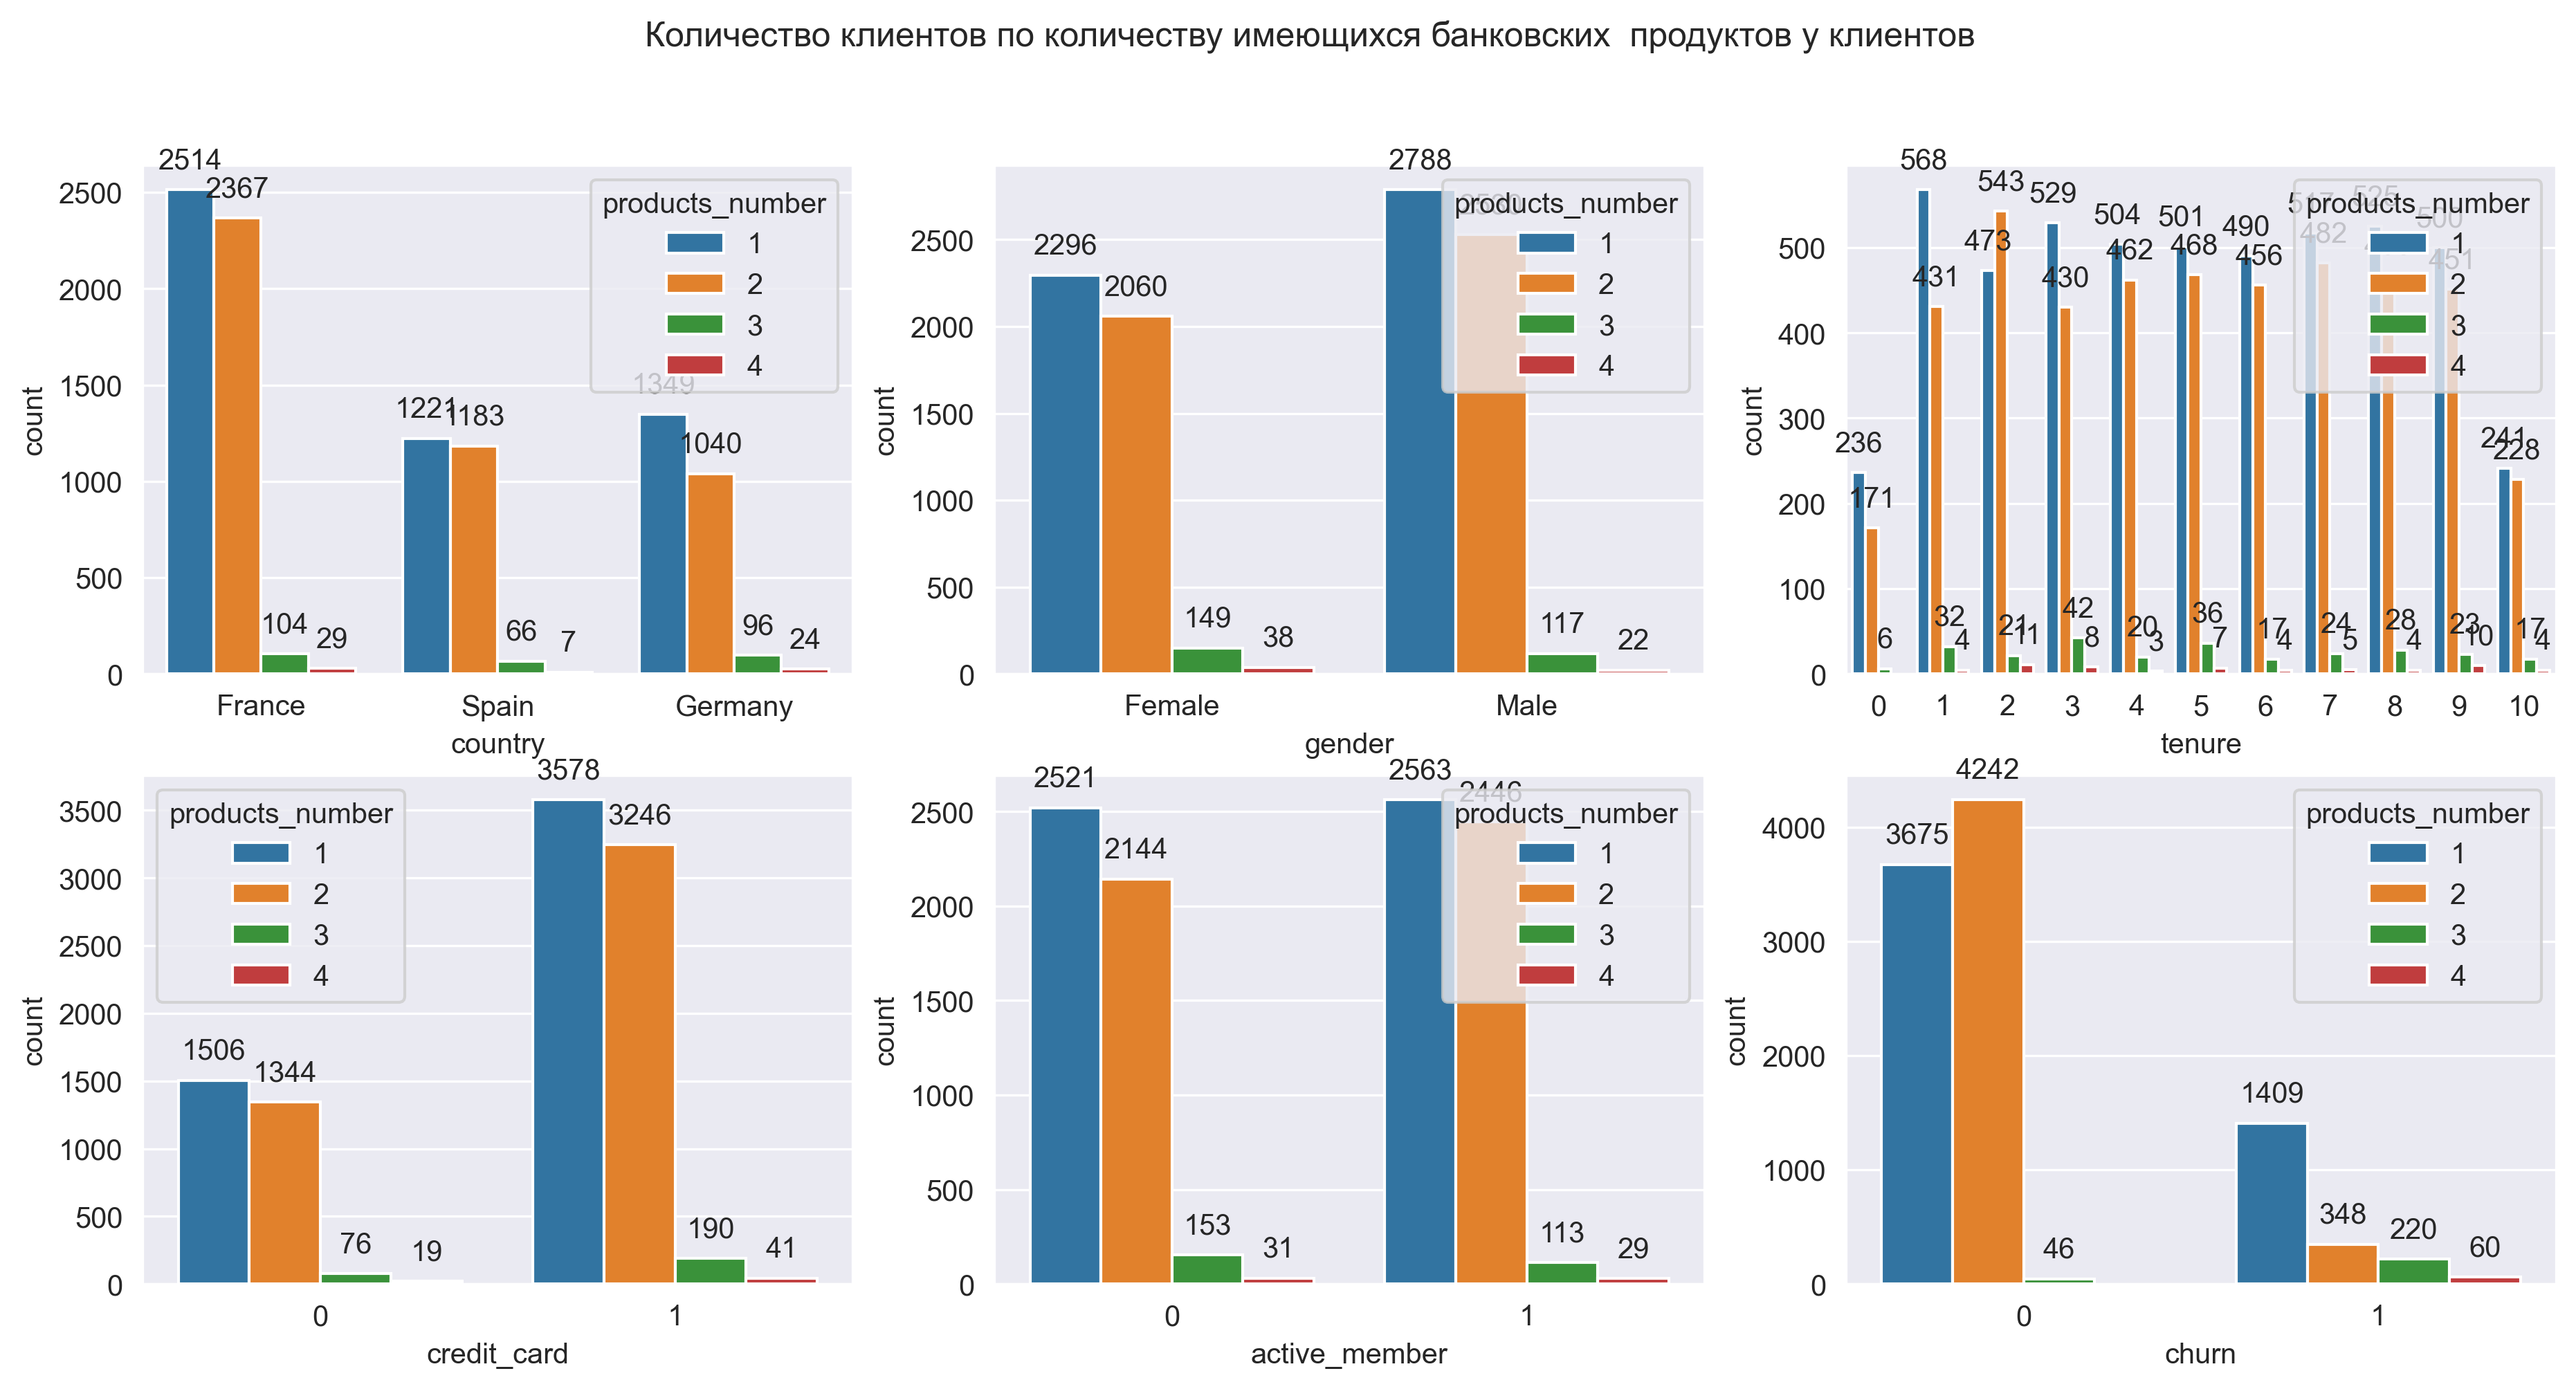

In [17]:
values = ['country', 'gender', 'tenure', 'credit_card', 'active_member', 'churn']

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 7) 
fig.set_dpi(300)

for variable, subplot in zip(values, ax.flatten()):
    splot = sns.countplot(data=bank, x=variable, hue='products_number', ax=subplot)
    for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
fig.suptitle("Количество клиентов по количеству имеющихся банковских  продуктов у клиентов");


- Больше всего 1, 2 продуктами пользуются жители Франции, меньше всего с одним продуктом в Испании, а с 2 продуктами- в Германии. 3 и 4 продуктами везде пользуются мало.
- 1 - 2 продуктами чаще пользуются мужчины, 3-4 женщины;
- Пользователей. имеющих продукты и пользующихся кредитными картами, больше чем тем, у кого нет кредитных карт.
- Активных и неактивных клиентов примерно одинаково.
- Неушедших клиентов с 4 продуктами нет, а с 3 продуктами очень мало.

## Выводы

На основании проведенного анализа на данном этапе можно составить следующие портреты клиентов, которые уйдут с очень большой вероятностью:

- женщины;
- клиенты в возрасте 44-45 лет;
- проживают в Германии и Испании;
- имеют большое количество продуктов, возможно это несколько кредитов, закрыв которые клиенты стремятся быстрее уйти из банка, возможно стоит пересмотреть условия для них.

Портрет более надежного клиента:
- мужчины;
- клиенты в возрасте до 44 лет;
- клиенты регулярно совершающие активности в приложении банка;
- пользователи двух продуктов банка.

### Рекомендации:

1. Поддерживать активность клиентов: привлекать клиентов к более активному использованию приложения/продуктов банка.
2. Предлагать дополнительные продукты клиентам с одним продуктом.
3. Пересмотреть условия услуг для клиентов от 46 лет и выше, провести акции по удержанию пользователей старших лет и женщин.
4. Клиенты с большим количеством продуктов склонны к оттоку, стоит разобраться и улучшить их качество.
5. Продолжить исследование в разрезе остальных показателей